In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import CommonFunction as cf
from ClassificationFunction import Classification
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
def seperateLabel(Nclass, X, t):
    ret = []
    for j in range(Nclass):
        ret.append([])
    for i in range(len(t)):
        ret[int(t[i])].append(X[i])
    return ret

Nsample = 210
sampleNoise = 0.1
Nclass = 3
centers = [
    [-0.5, 1],
    [0, 0.5],
    [0.5, 1],
]
subSamples = int(Nsample/3)
eta_value = 0.05

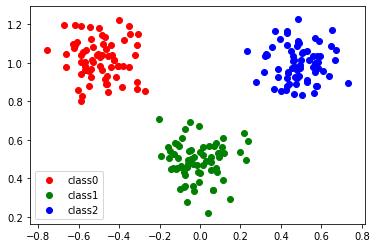

In [3]:
X_train, t_train = skdata.make_blobs(n_samples = [subSamples, subSamples, subSamples], 
                         cluster_std = sampleNoise, random_state = 0, shuffle = False, centers = centers)

plt.scatter(X_train[:subSamples, 0], X_train[:subSamples, 1], c = 'r', label = "class0")
plt.scatter(X_train[subSamples:subSamples*2, 0], X_train[subSamples:subSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X_train[subSamples*2:, 0], X_train[subSamples*2:, 1], c = 'b', label = "class2")

t_train = t_train.reshape(-1,1)

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
    lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
    lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
    lambda x: np.power(x[:, 0], 4),
    lambda x: np.power(x[:, 1], 4),
]

Xfeatures_train = cf.CommonFunction(X_train, funcs).generate()

enc = OneHotEncoder(handle_unknown='ignore')
Y_train = enc.fit_transform(t_train).toarray()
classifier = Classification(Xfeatures_train, Y_train, NumEpochs = 100, eta = eta_value).fit()

plt.legend()

In [4]:
X_test, t_test = skdata.make_blobs(n_samples = [subSamples, subSamples, subSamples], 
                         cluster_std = sampleNoise, random_state = 100, shuffle = True, centers = centers)
t_test = t_test.reshape(-1,1)
Xpredict = cf.CommonFunction(X_test, funcs).generate()

enc = OneHotEncoder(handle_unknown='ignore')
Y_test = enc.fit_transform(t_test).toarray()

#prediction = classifier.predictLabel(Xpredict,reshape = True)
prediction = classifier.predictNclass(Xpredict, t_test)

#Using scikit_learn
clf = LogisticRegression(l1_ratio=eta_value)
clf.fit(X_train, t_train)
t_pred = clf.predict(X_test)
mse_scikit = mean_squared_error(t_test, t_pred)
print("MSE of scikit_learn:",mse_scikit)

Z.shape:  (210, 3)
yh.shape: (210, 3)
MSE =  [[0.0047619]]
MSE of scikit_learn: 0.004761904761904762


C:\Users\vicen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vicen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\vicen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vicen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Z.shape:  (90000, 3)
yh.shape: (90000, 3)


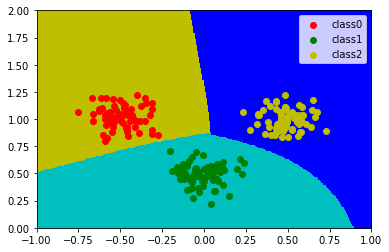

In [5]:
xlim = (-1, 1)
ylim = (0, 2)

subSamples = int(len(t_test)/3)
X, t = skdata.make_blobs(n_samples = [subSamples, subSamples, subSamples], 
                         cluster_std = sampleNoise, random_state = 0, shuffle = False, centers = centers)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xyFeatures = cf.CommonFunction(xygrid, funcs).generate()
prediction = classifier.predictLabel(xyFeatures,reshape = True)

label = seperateLabel(Nclass,xygrid, prediction)

X0 = np.array(label[0])
X1 = np.array(label[1])
X2 = np.array(label[2])
plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)
plt.scatter(X2[:, 0].ravel(), X2[:, 1].ravel(), c = 'b', marker = 's', s = 5)

plt.scatter(X[:subSamples, 0], X[:subSamples, 1], c = 'r', label = "class0")
plt.scatter(X[subSamples:subSamples*2, 0], X[subSamples:subSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X[subSamples*2:, 0], X[subSamples*2:, 1], c = 'y', label = "class2")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()

In [6]:
print(prediction)

[[1.]
 [1.]
 [1.]
 ...
 [2.]
 [2.]
 [2.]]
